# Python Workshop

This workshop will review Python fundamentals 
and prepare you for Galvanize's DSI.

# Object Oriented Programming (OOP)

Until now, we have designed our programs around functions -- blocks of statements that manipulate data. This is called the procedure-oriented way of programming. There is another way of organizing your program which is to combine data and functionality and wrap it inside something called an object. This is called the object oriented programming paradigm.

In [1]:
# But first....
import this
this;

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# 1. Classes and Objects
* A class creates a new type where objects are instances of the class.
* Objects can store data using variables that belong to a class. Variables that belong to an object or class are referred to as `fields`. 
* Objects can also have functionality by using functions that belong to a class. Such functions are called `methods` of the class. 
* This terminology is important because it helps us to differentiate between functions and variables which are independent and those which belong to a class or object. 
* Collectively, the fields and methods of a class can be referred to as `attributes`.

## Example: Dog Object

### Dogs can be described in terms of their attributes
* size
* breed
* name
* favorite toy

### Dogs have behaviors and abilities
* run
* bark
* eat
* sleep

### In the language of OOP
* Attributes: size, breed, name, favorite toy
* Methods: run, bark, eat, sleep

## 1.0 Class vs Instance
* `object` is used broadly to refer to classes or instances of classes
* `class` refers to the set of attributes, methods, etc. that define a group of objects
* `instance` refers to a specific example of a class

In the example below, Dog is a class. My dog Snoopy is an instance of the Dog class.

In [2]:
# Class definition
class Dog(object):
    """Common household pet"""
    def __init__(self, name, breed, favorite_toy):
        """
        Args:
            name (str): the dog's name, ex. "Snoopy"
            breed (str): the breed of the dog, ex. "Beagle"
            favorite_toy (str): something the dog likes to play with most
        
        """
        self.name = name
        self.breed = breed
        self.favorite_toy = favorite_toy
        

In [3]:
# Class instantiation
my_dog = Dog('Snoopy', 'Beagle', 'Frisbee')

In [4]:
# Class attributes
print (my_dog.name)
print (my_dog.breed)
print (my_dog.favorite_toy)

Snoopy
Beagle
Frisbee


## 1.1 Encapsulation
Encapsulation is an object-oriented programming concept that binds together the data and functions that manipulate the data, and that keeps both safe from outside interference and misuse. 

In [5]:
class Car:
 
    def __init__(self):
        self.__updateSoftware()
 
    def drive(self):
        print ('driving')
 
    def __updateSoftware(self):
        print ('updating software')
 
redcar = Car()
redcar.drive()

updating software
driving


But what if I want to update the redcar's software?  
```
redcar.__updateSoftware()
AttributeError: 'Car' object has no attribute '__updateSoftware'
```

The program designer is telling the user something about their program: `_updateSoftware` is a private method, and is only needed internally. That said, Python is a gentlemen's sport and private methods are still accesible if you really try.

```
redcar._Car__updateSoftware()
```

## 1.2 Polymorphism
The ability to create multiple instances of a Class.  
```
my_dog = Dog('Snoopy', 'Beagle', 'Frisbee')
your_dog = Dog('Spot', 'Poodle', "Tennis Ball")
```

Subtyping, a form of polymorphism, is when calling code can be agnostic as to whether an object belongs to a parent class or one of its descendants. Recall `defaultDict` from this morning. It inherits from the class `dict`, including all if its methods such as `.get()`

In [6]:
from collections import defaultdict
issubclass(defaultdict, dict)

True

In [7]:
ice_cream = defaultdict(lambda: 'vanilla')
ice_cream['Elliot'] = 'Chocalate'
ice_cream.get('Elliot') 

'Chocalate'

## 1.3 Message Passing
You can add `methods` to an object to give it more functionality

In [8]:
class Dog(object):
    """Common household pet"""
    
    def __init__(self, name, breed, favorite_toy):
        """
        Args:
            name (str): the dog's name, ex. "Snoopy"
            breed (str): the breed of the dog, ex. "Beagle"
            favorite_toy (str): something the dog likes to play with most
        """
        self.name = name
        self.breed = breed
        self.favorite_toy = favorite_toy
        
        
    def bark(self):
        """Causes the dog to bark"""
        print ('ruff ruff ruff!')
        
        
my_dog = Dog('Snoopy', 'Beagle', 'Frisbee')
my_dog.bark()

ruff ruff ruff!


Objects can also interact with each other vis-a-vis methods
* In a game, player objects could interact with a playing card object
* In a our earlier example, a person object could interact with a dog object
* Structuring code in this way makes code more reusable and easier to read

In [9]:
class Dog(object):
    """Common household pet"""
    
    def __init__(self, name, breed, favorite_toy, has_toy=False, plays_fetch=True):
        """
        Args:
            name (str): the dog's name, ex. "Snoopy"
            breed (str): the breed of the dog, ex. "Beagle"
            favorite_toy (str): something the dog likes to play with most
            has_toy (bool): wehther the dog has its favorite toy
            plays_fetch (bool): whether the dog knows how to play fetch
        """
        self.name = name
        self.breed = breed
        self.favorite_toy = favorite_toy
        self.has_toy = has_toy
        self.plays_fetch = plays_fetch
        
        
    def bark(self):
        """Causes the dog to bark"""
        print ('ruff ruff ruff!')

class Person(object):
    """Human who may have a Dog"""
    def __init__(self, name):
        """
        Args:
            name (str): name of the person
        """
        self.name = name
        
    def introduce(self):
        print ('My name is {name}.'.format(name=self.name))
        
    def play_fetch(self, dog):
        """Person plays a game of fetch with dog"""
        print ('Go get the {toy} {dog_name}!'.format(toy=dog.favorite_toy, 
                                                     dog_name=dog.name)
              )
        if dog.plays_fetch:
            dog.bark()
            dog.has_toy = True
            print ('Good job {dog_name}!'.format(dog_name=dog.name))
        else:
            dog.has_toy = False
            print ('Try again {dog_name}!'.format(dog_name=dog.name))
        
        

In [10]:
person = Person('Charlie Brown')
dog = Dog('Snoopy', 'Beagle', 'frisbee')
person.introduce()
person.play_fetch(dog)

My name is Charlie Brown.
Go get the frisbee Snoopy!
ruff ruff ruff!
Good job Snoopy!


## 1.4 Inheritance

In [25]:
class SchoolMember:
    '''Represents any school member.'''
    def __init__(self, name, age):
        self.name = name
        self.age = age
        print('(Initialized SchoolMember: {})'.format(self.name))

    def tell(self):
        '''Tell my details.'''
        print('Name:"{}" Age:"{}"'.format(self.name, self.age), end=" ")


class Teacher(SchoolMember):
    '''Represents a teacher.'''
    def __init__(self, name, age, salary):
        SchoolMember.__init__(self, name, age)
        self.salary = salary
        print('(Initialized Teacher: {})'.format(self.name))

    def tell(self):
        SchoolMember.tell(self)
        print('Salary: "{:d}"'.format(self.salary))


class Student(SchoolMember):
    '''Represents a student.'''
    def __init__(self, name, age, marks):
        SchoolMember.__init__(self, name, age)
        self.marks = marks
        print('(Initialized Student: {})'.format(self.name))

    def tell(self):
        SchoolMember.tell(self)
        print('Marks: "{:d}"'.format(self.marks))

In [26]:
t = Teacher('Dr. Cohen', 32, 10**12)
s = Student('Sam', 25, 99)

(Initialized SchoolMember: Dr. Cohen)
(Initialized Teacher: Dr. Cohen)
(Initialized SchoolMember: Sam)
(Initialized Student: Sam)


In [27]:
t.tell()

Name:"Dr. Cohen" Age:"32" Salary: "1000000000000"


In [24]:
members = [t, s]
for member in members:
    # Works for both Teachers and Students
    member.tell()

Name:"Dr. Cohen" Age:"32" Name:"Sam" Age:"25" Marks: "99"


In [14]:
issubclass(Teacher, SchoolMember)

True

# 2. Class "Magic Methods"
* You can add special features to your classes using "magic methods"
* ex. str(my_dog) could return 'Name: Beagle, Favorite Toy: Frisbee'

In [36]:
# Magic methods: __len__ and __str__
class Dog(object):
    """Common household pet"""
    
    def __init__(self, name, breed, favorite_toy, has_toy=False, plays_fetch=True):
        """
        Args:
            name (str): the dog's name, ex. "Snoopy"
            breed (str): the breed of the dog, ex. "Beagle"
            favorite_toy (str): something the dog likes to play with most
            has_toy (bool): whether the dog has its favorite toy
            plays_fetch (bool): whether the dog knows how to play fetch
        """
        self.name = name
        self.breed = breed
        self.favorite_toy = favorite_toy
        self.has_toy = has_toy
        self.plays_fetch = plays_fetch
        
    def __len__(self):
        """The length of a dog is the length of its name"""
        return len(self.name)
    
    def __str__(self):
        """Name, Breed, Favorite Toy"""
        return '{name}, {breed}, {favorite_toy}'.format(name=self.name, 
                                                        breed=self.breed, 
                                                        favorite_toy=self.favorite_toy)
    def __gt__(self, other):
        return(len(self.name) > len(other.name))
    
    
my_dog = Dog('Snoopy', 'Beagle', 'Frisbee')
your_dog = Dog('Copernicus', 'Poodle', 'Tennis Ball')

In [37]:
my_dog > your_dog

False

In [16]:
# Magic method: __add__
class FruitBasket(object):
    """A collection of apples and pears"""
    
    def __init__(self, num_apples, num_pears):
        """
        Args:
            num_apples (int): number of apples in the basket
            num_pears (int): number of pears in the basket
        """
        self.num_apples = num_apples
        self.num_pears = num_pears
        
    def __add__(self, other):
        """Combines two baskets into one"""
        num_apples = self.num_apples + other.num_apples
        num_pears = self.num_pears + other.num_pears
        new_basket = FruitBasket(num_apples, num_pears)
        return new_basket
    
basket1 = FruitBasket(10, 20)
basket2 = FruitBasket(30, 40)
basket3 = basket1 + basket2
print (basket3.num_apples, basket3.num_pears)

40 60


In [17]:
# __add__ is how addition works with numeric types too
a, b = 1, 2
print (a + b)
print (a.__add__(b))

3
3


## More info about magic methods:
http://www.rafekettler.com/magicmethods.html

# 3. OOP in Data Science
* `sklearn` is expert at abstracting away the implimentation details of each algorithim, providing a consistent API.
* This will be explored in depth starting next week during the DSI
* But here's a sneak-peak:

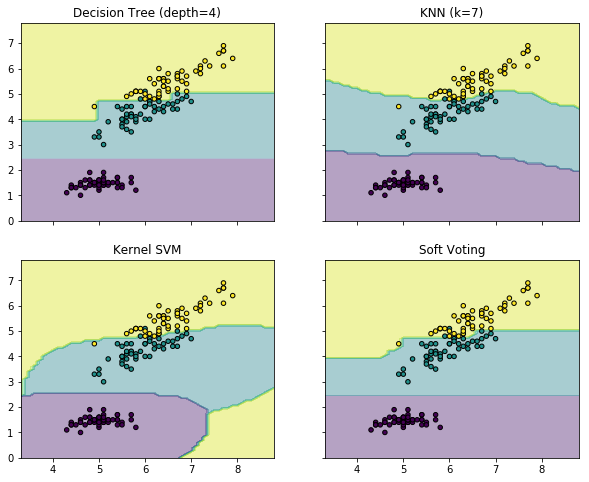

In [18]:
"""
==================================================
Plot the decision boundaries of a VotingClassifier
==================================================

Plot the decision boundaries of a `VotingClassifier` for
two features of the Iris dataset.

Plot the class probabilities of the first sample in a toy dataset
predicted by three different classifiers and averaged by the
`VotingClassifier`.

First, three exemplary classifiers are initialized (`DecisionTreeClassifier`,
`KNeighborsClassifier`, and `SVC`) and used to initialize a
soft-voting `VotingClassifier` with weights `[2, 1, 2]`, which means that
the predicted probabilities of the `DecisionTreeClassifier` and `SVC`
count 5 times as much as the weights of the `KNeighborsClassifier` classifier
when the averaged probability is calculated.

"""
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()